# Machine Learning for Predictive Analytics

### About

##### The project relates to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling to maintain its strong foothold in local market because of:
##### - High churn rate amongst customers leading to a revenue decline of ~500k USD every month
##### - Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share


### Objectives/Exercise:
##### 1. Perform initial data preparation
##### 1. a Number of customers with zero monthly revenue?
##### 1. b Number of customers with missing values percentage > 5%?
##### 1. c Remove outliers for columns ‘UniqueSubs’ and ‘DirectorAssistedCalls’ is any.
##### 2. Perform exploratory analysis to analyse customer churn
##### 2. a Do customers with high overage minutes also have high revenue?
##### 2. b Does high number of active subscribers lead to low monthly revenue?
##### 2. c Does credit rating have an impact on churn rate?
##### 3. Create additional features to help predict churn
##### 3. a Percent of current active subs over total subs
##### 3. b Percent of recurrent charge to monthly charge
##### 3. c Percent of overage minutes over total monthly minutes
##### 4. Build classification model to predict customer churn
##### 4. a Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set
##### 4. b Build Random Forest classifier to compare model accuracy over the logistic regression model
##### 4. c Identify most important features impacting churn (Model evaluation metrics to be used: GINI, AUC, Precision and Recall)
##### 5. Use the ‘Prediction Data’ provided to predict churners using the best model identified in step 4
##### 6. Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model


## Packages and setup

In [1]:
# Importing the necessary modules 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
# Reading the data
cust_df=pd.read_csv("C:/Users/preet/Desktop/Virtual Internships/VIP AINE AI/Machine Learning for Predictive Analytics/Telecom Data.csv")

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

We can observe that the dataset has 51,047 rows and 58 columns

In [4]:
# Displaying the names of each column in the dataset
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [5]:
# First 5 rows of the dataset
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [6]:
# Last 5 rows of the dataset
cust_df.tail()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No
51046,3399994,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,No,1,60,Yes,5-Low,Other,Other,Unknown


In [12]:
# Displaying details about each column 
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

We can infer that many of the columns hold numeric values such as float or integers

In [8]:
cust_df['Churn'].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In the dataset we have 36,336 customers who did not churn and 14,711 who did churn

In [15]:
# The percentage of customers who churn
100*cust_df['Churn'].value_counts()/cust_df.shape[0]


# Inference: it is highly imbalanced

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

In [14]:
# Counting the number of NA values in each column
cust_df.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

Most columns do not have any NA values

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [16]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df[cust_df.MonthlyRevenue==0].shape[0]

cust_df = cust_df[cust_df.MonthlyRevenue > 0.0]


6

In [17]:
# We exclude the customers with zero monthly minutes from cust_df

cust_df = cust_df[cust_df["MonthlyMinutes"]>0.0]

### Q1.2 How many columns has missing values percentage > 5%

In [18]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

100*(cust_df.isnull().sum()/cust_df.shape[0])

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    
**Answer**: None of the columns have more than 5% of missing values. Since the number of missing values in each column is very low, we can drop the rows with missing values

In [20]:
cust_df.dropna(axis=0,inplace=True)
cust_df.shape[0]

49078

We now have 49,078 rows

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

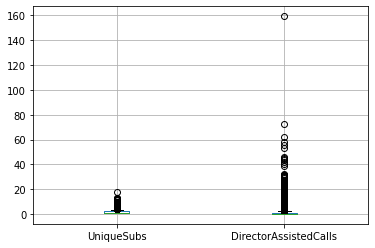

In [21]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


<AxesSubplot:>

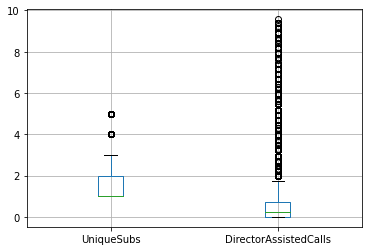

In [22]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

q_value = [i/100 for i in range(95, 101, 1)]
cust_df[cols].quantile(q_value)

cust_df = cust_df[(cust_df.UniqueSubs <= 5) & (cust_df.DirectorAssistedCalls <= 9.6156)]
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

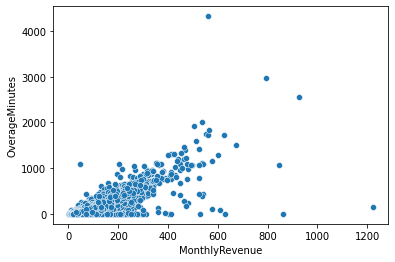

In [23]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

We can observe an upward trend which indicates a positive relationship between Monthly revenue and overage minutes. Now we will create this scatterplot for churned and non churned customers separately

Text(0.5, 1.0, 'Scatterplot for Non Churned customers')

<AxesSubplot:title={'center':'Scatterplot for Non Churned customers'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

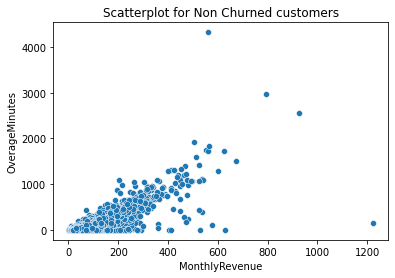

In [24]:
plt.title("Scatterplot for Non Churned customers")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="No"])
plt.show()

Text(0.5, 1.0, 'Scatterplot for Churned customers')

<AxesSubplot:title={'center':'Scatterplot for Churned customers'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

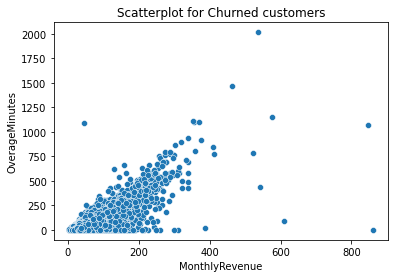

In [26]:
plt.title("Scatterplot for Churned customers")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="Yes"])
plt.show()

<mark>__Result:__
    
We can infer that there is an upward trend and that both values are increasing. Therefore, there is a positive relationship between Monthly Revenue and Overage Minutes. This positive relationship exists even when we consider churned and non churned customers separately

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

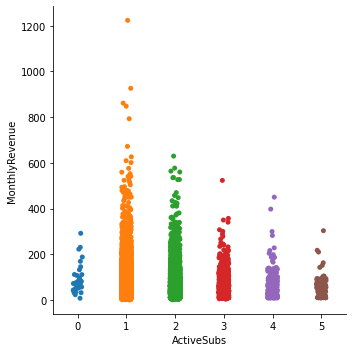

In [27]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs", y="MonthlyRevenue",data=cust_df) 

<mark>__Result:__
    
We can infer that as the number of active subscribers increases, the monthly revenue decreases

### Q2.3 Does credit rating have an impact in churn rate?

In [28]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r:r/r.sum(), axis = 0)
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r:r/r.sum(), axis = 1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.698608,0.7039,0.69738,0.745876,0.785889,0.739905,0.718026
Yes,0.301392,0.2961,0.30262,0.254124,0.214111,0.260095,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161849,0.371062,0.160179,0.109358,0.138555,0.017938,0.041060
Yes,0.177734,0.397318,0.176928,0.094840,0.096086,0.016051,0.041044


<mark>__Result:__
    
We can infer that for all credit scores, there are customers who are churning. We can infer that the proportion of churned customers is greater for higher credit scores

### Placeholder for additional exploratory analysis

In [13]:
#type your code here for any additional exploratory analysis (if any)

# Observing the counts of different occupations among customers
cust_df['Occupation'].value_counts()

Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: Occupation, dtype: int64

A majority of the customers have a Professional occupation

In [30]:
# Analyzing the Marital Status of customers
cust_df['MaritalStatus'].value_counts()

Unknown    18087
Yes        18010
No         12277
Name: MaritalStatus, dtype: int64

There is a greater number of married customers than unmarried customers

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='MonthlyMinutes'>

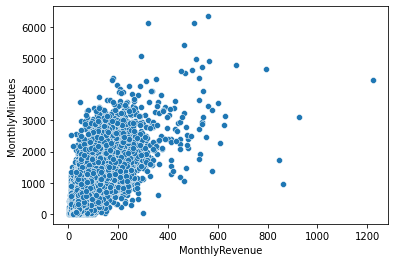

In [31]:
# Monthly revenue vs Monthly minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'MonthlyMinutes', data = cust_df)

We can infer that there is a positive relationship between monthly revenue and monthly minutes

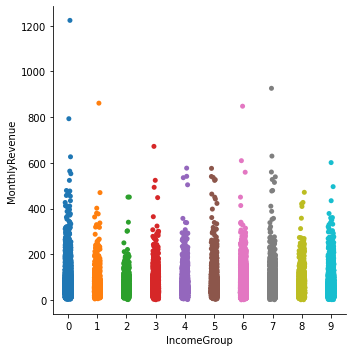

In [32]:
# Category plot of monthly revenue across different income group categories
sns.catplot(x="IncomeGroup", y="MonthlyRevenue",data=cust_df) 

We can infer that the monthly revenue has a fairly even spread across different income groups

## Q3. Create additional features to help predict churn

In [33]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge']/cust_df["MonthlyRevenue"]
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute']=cust_df['OverageMinutes']/cust_df["MonthlyMinutes"]
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    #3.4 Percent of dropped calls over total monthly minutes
    
    cust_df['perc_dropped_calls']=cust_df['DroppedCalls']/cust_df["MonthlyMinutes"]
    
    #3.5 Percent of unanswered calls over total monthly minutes
    
    cust_df['perc_unanswered_calls']=cust_df['UnansweredCalls']/cust_df["MonthlyMinutes"]
    
    #3.6 Percent of roaming calls over total monthly minutes
    
    cust_df['perc_roaming_calls']=cust_df['RoamingCalls']/cust_df["MonthlyMinutes"]
    
    #3.7 Percent of customer care calls over total monthly minutes
    
    cust_df['perc_customer_care_calls']=cust_df['CustomerCareCalls']/cust_df["MonthlyMinutes"]
    
    #3.8 Percent of threeway calls over total monthly minutes
    
    cust_df['perc_threeway_calls']=cust_df['ThreewayCalls']/cust_df["MonthlyMinutes"]
    
    #3.9 Percent of Received calls over total monthly minutes
    
    cust_df['perc_received_calls']=cust_df['ReceivedCalls']/cust_df["MonthlyMinutes"]
    
    #3.10 Percent of inbound calls over total monthly minutes
    
    cust_df['perc_inbound_calls']=cust_df['InboundCalls']/cust_df["MonthlyMinutes"]

    #3.11 Percent of outbound calls over total monthly minutes
    
    cust_df['perc_outbound_calls']=cust_df['OutboundCalls']/cust_df["MonthlyMinutes"]
    
    return cust_df  


In [34]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)


In [35]:
# Defining a function to separate the columns depending on whether they hold categorical or continuous values
def check_categorical(cust_df):
    colnames = cust_df.columns
    categorical_col = []
    continuous_col = []
    for i in colnames:
        if cust_df[i].nunique() < 20:
            if i != "Churn":
                categorical_col.append(i)
        else:
            if i not in ["CustomerID", "ServiceArea"]:
                continuous_col.append(i)
                
    return (categorical_col, continuous_col)

In [45]:
# Defining a function to determine which factors are important in terms of modelling
def check_categorical_imp(cust_df, categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
            pass
        else:
            new_categorical_col.append(i)
    
    return new_categorical_col

In [37]:
categorical_col, continuous_col = check_categorical(cust_df)

In [38]:
cust_df.shape

(48374, 69)

We currently have 48,374 rows and 69 columns

In [39]:
cust_df.Churn.value_counts()

No     34730
Yes    13644
Name: Churn, dtype: int64

The distribution between non churned and churned customers is not balanced

In [41]:
# Oversampling
cust_df["Churn"]=cust_df["Churn"].replace(["Yes", "No"], [1,0])
class_count_0, class_count_1 = cust_df['Churn'].value_counts()

class_0 = cust_df[cust_df['Churn']==0]
class_1 = cust_df[cust_df['Churn']==1]

class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0],axis=0)

cust_df = test_over

y = cust_df.Churn
y.value_counts()/len(y)*100

0    50.0
1    50.0
Name: Churn, dtype: float64

In [46]:
important_categorical_col = check_categorical_imp(cust_df, categorical_col)

y = cust_df.Churn
customerid = cust_df.MonthlyRevenue

cust_df = cust_df[important_categorical_col+continuous_col]

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [47]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scaling continuous variables from the dataframe

cust_df[continuous_col] = sc.fit_transform(cust_df[continuous_col])

#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)
cust_df = pd.get_dummies(cust_df,columns = important_categorical_col, drop_first = True)

In [48]:
cust_df["CustomerID"] = customerid
X=cust_df

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
y_train.value_counts()

1    24462
0    24160
Name: Churn, dtype: int64

In [50]:
X.shape

(69460, 150)

In [51]:
train_custid = X_train.CustomerID
test_custid = X_test.CustomerID
test_monthlyrevenue = X_test.MonthlyRevenue
# Dropping Customer ID as it is not important for training
X_train.drop(["CustomerID"], inplace=True, axis=1)
X_test.drop(["CustomerID"], inplace=True, axis=1)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [55]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, plot_confusion_matrix, average_precision_score
from copy import deepcopy

# Training
logistic_classifier = LogisticRegression(random_state=0).fit(X_train, y_train)

# Storing the probabilities of the predictions during training
logistic_pred_train_output = logistic_classifier.predict_proba(X_train)[:,1]

Text(0.5, 0, 'Probability cutoff value train')

Text(0, 0.5, 'F1 score train')

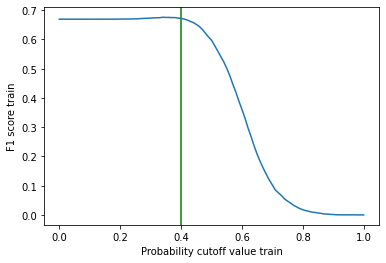

In [59]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model

#Storing the probabilities of the predictions during testing
logistic_pred_test_output = logistic_classifier.predict_proba(X_test)[:,1]


# Calculating the probability cutoff by tring different threshold values and seeing which gives the best F1 score
def efficient_cutoff(actual_value, predicted):
    probability_cutoff = []
    f1_score_value = []
    
    for i in range(0, 101):
        predicted_x = deepcopy(predicted)
        predicted_x[predicted_x >= i / 100] = 1
        predicted_x[predicted_x < i / 100] = 0
        probability_cutoff.append(i/100)
        f1_score_value.append(f1_score(actual_value, predicted_x))
    
    return (probability_cutoff, f1_score_value)




probability_cutoff, f1_score_value = efficient_cutoff(y_train, logistic_pred_train_output)

plt.xlabel("Probability cutoff value train")
plt.axvline(x= 0.4, color = 'g', label='axvline - full height')
plt.ylabel('F1 score train')
plt.plot(probability_cutoff,f1_score_value)
plt.show()




Text(0.5, 0, 'Probability cutoff value test')

Text(0, 0.5, 'F1 score test')

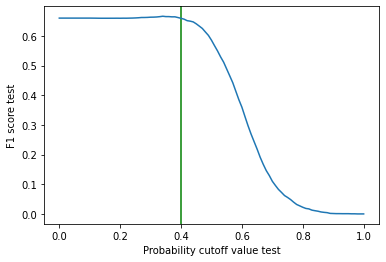

In [60]:
probability_cutoff, f1_score_value = efficient_cutoff(y_test, logistic_pred_test_output)

plt.xlabel("Probability cutoff value test")
plt.axvline(x= 0.4, color = 'g', label='axvline - full height')
plt.ylabel('F1 score test')
plt.plot(probability_cutoff,f1_score_value)
plt.show()

In [63]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)


logistic_pred_test_output[logistic_pred_test_output>=0.4]=1
logistic_pred_test_output[logistic_pred_test_output<0.4]=0




#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

print(classification_report(y_test, logistic_pred_test_output))
auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:,1])
print("Gini: {}".format(2*auc-1))
print("The ROC_AUC of logistic classifier for test data: {}".format(auc))


              precision    recall  f1-score   support

           0       0.67      0.23      0.35     10570
           1       0.53      0.88      0.66     10268

    accuracy                           0.55     20838
   macro avg       0.60      0.56      0.50     20838
weighted avg       0.60      0.55      0.50     20838

Gini: 0.243915348692874
The ROC_AUC of logistic classifier for test data: 0.621957674346437


In [64]:
confusion_matrix(y_test, logistic_pred_test_output)
TN, FP, FN, TP = confusion_matrix(y_test, logistic_pred_test_output).ravel()

array([[2480, 8090],
       [1237, 9031]], dtype=int64)

In [65]:
TN, FP, FN, TP

(2480, 8090, 1237, 9031)

We observe that there is a high number of False positives which may explain why the accuracy is low

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [66]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=15, min_samples_split=50, random_state=40, criterion="entropy",n_estimators=350,n_jobs=-1)
clf.fit(X_train,y_train)



RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=50,
                       n_estimators=350, n_jobs=-1, random_state=40)

Text(0.5, 0, 'probability cutoff value train')

Text(0, 0.5, 'F1 score train')

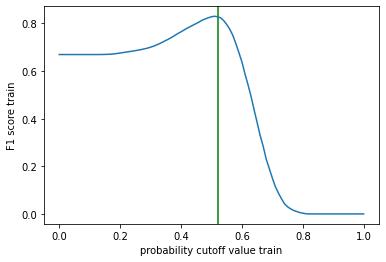

Text(0, 0.5, 'F1 score test')

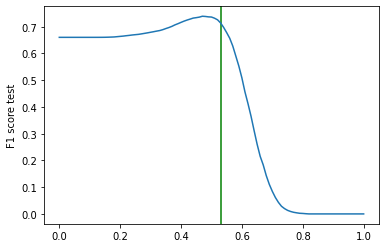

In [67]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model

rf_train_output = clf.predict_proba(X_train)[:,1]
rf_test_output = clf.predict_proba(X_test)[:,1]

probability_cutoff, f1_score_value = efficient_cutoff(y_train, rf_train_output)

plt.axvline(x=0.52, color='g', label='axvline - full height')
plt.xlabel("probability cutoff value train")
plt.ylabel("F1 score train")
plt.plot(probability_cutoff,f1_score_value)
plt.show()

probability_cutoff, f1_score_value = efficient_cutoff(y_test, rf_test_output)
plt.axvline(x=0.53, color='g', label='axvline - full height')
plt.ylabel("F1 score test")
plt.plot(probability_cutoff, f1_score_value)
plt.show()




(array([ 158.,  523.,  937., 2068., 3135., 4988., 5291., 2813.,  843.,
          82.]),
 array([0.12706323, 0.19561589, 0.26416855, 0.33272121, 0.40127386,
        0.46982652, 0.53837918, 0.60693184, 0.6754845 , 0.74403716,
        0.81258981]),
 <BarContainer object of 10 artists>)

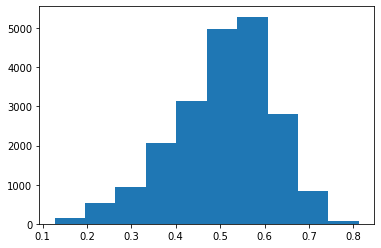

In [68]:
plt.hist(rf_test_output)

In [69]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

rf_test_output[rf_test_output<0.53] = 0
rf_test_output[rf_test_output>=0.53]=1


#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix


print(classification_report(y_test,rf_test_output))
test_auc = roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1])




              precision    recall  f1-score   support

           0       0.72      0.75      0.74     10570
           1       0.73      0.70      0.71     10268

    accuracy                           0.73     20838
   macro avg       0.73      0.72      0.72     20838
weighted avg       0.73      0.73      0.72     20838



In [70]:
print("Gini: {}".format(2*test_auc-1))
print("The ROC_AUC for the test random forest classifier is {}".format(test_auc))



Gini: 0.6096041784987316
The ROC_AUC for the test random forest classifier is 0.8048020892493658


In [71]:
confusion_matrix(y_test, rf_test_output)
TN, FP, FN, TP = confusion_matrix(y_test, rf_test_output).ravel()


array([[7962, 2608],
       [3120, 7148]], dtype=int64)

In [72]:
TN, FP, FN, TP

(7962, 2608, 3120, 7148)

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
**Answer** On analyzing the results of the models we can conclude that random forest performed better as it has a much higher accuracy which is around 0.74. Similarly the precision, recall, confusion matrix and AUC metric values also suggest that the random forest classifier has performed better than the logistic regression model

### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'Top 20 Important features')

<AxesSubplot:title={'center':'Top 20 Important features'}>

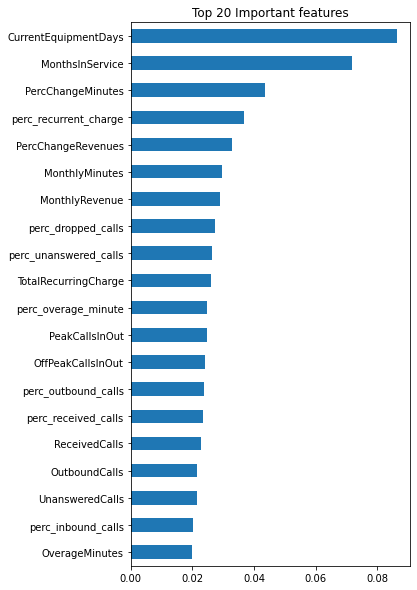

In [75]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feature_importances = pd.Series(clf.feature_importances_,index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("Top 20 Important features")
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',)


We observe that Current equipment days has been identified as the most important feature. We also observe that many of the additional features we created such as perc_recurrent_charge, perc_dropped_calls, perc_unanswered_calls etc. are in the top 20 most important features.